In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
numerical_variables = ['RIAGENDR','RIDAGEYR','BMXBMI','BPXPLS','DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA','MET_rec']
categorical_variables = ['RIDRETH3','DR1_300']

In [5]:
df1 = df[numerical_variables+categorical_variables+['LBXTC']].copy()

In [6]:
df1.dropna(inplace=True)

In [7]:
y = df1.LBXTC
X = df1.drop('LBXTC', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)

In [17]:
rf1 = Pipeline(steps=[('rfr1',RandomForestRegressor())])
params = {
    'rfr1__n_estimators':[100,200],
    'rfr1__max_depth':[10,20,50],
    'rfr1__max_features':[2,5,10,20],
    
}

In [18]:
grid1 = GridSearchCV(rf1,params,scoring='neg_mean_absolute_error',verbose=0)
grid1.fit(X_train,y_train)
grid1.best_params_

{'rfr1__max_depth': 10, 'rfr1__max_features': 10, 'rfr1__n_estimators': 200}

In [19]:
grid1.best_score_

-30.891465317978636

In [20]:
y_preds = grid1.predict(X_test)
print('Mean Absolute error for test set:',mean_absolute_error(y_test, y_preds))

Mean Absolute error for test set: 30.837932725183144


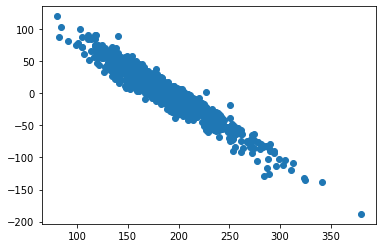

In [21]:
residuals = y_preds-y_test
plt.scatter(y_test,residuals)